In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline # to display the graph inline

UsageError: unrecognized arguments: # to display the graph inline


In [5]:
housing = pd.read_csv("Movies/Data Files/housing_prices.csv")
housing.shape
housing.head()
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

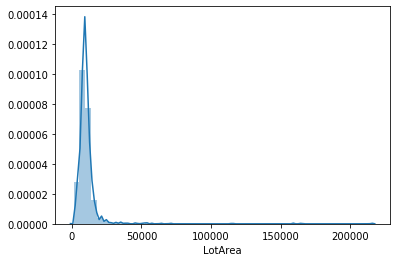

In [10]:
#Analyze the spread of Lot Area. The below graph shows lot of skew and outliers. Not an udf
#sns.distplot(housing['LotArea'], kde = False)
sns.distplot(housing['LotArea'], kde = True)

[Text(0, 0, 'VinylSd'),
 Text(0, 0, 'MetalSd'),
 Text(0, 0, 'Wd Sdng'),
 Text(0, 0, 'HdBoard'),
 Text(0, 0, 'BrkFace'),
 Text(0, 0, 'WdShing'),
 Text(0, 0, 'CemntBd'),
 Text(0, 0, 'Plywood'),
 Text(0, 0, 'AsbShng'),
 Text(0, 0, 'Stucco'),
 Text(0, 0, 'BrkComm'),
 Text(0, 0, 'AsphShn'),
 Text(0, 0, 'Stone'),
 Text(0, 0, 'ImStucc'),
 Text(0, 0, 'CBlock')]

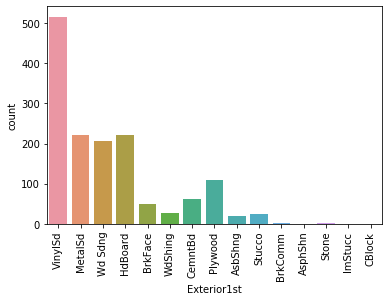

In [15]:
#for bar chart use countplot function
plot = sns.countplot(x='Exterior1st', data = housing)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90) # rotation of n degrees

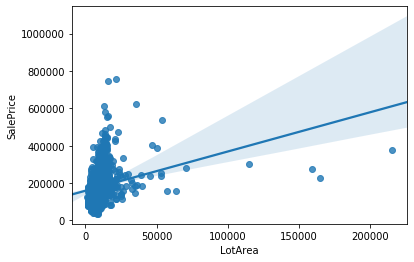

In [18]:
#use regplot for bivariate analysis to see the relation b/w sale price and lot area. 
#Gives a scatter plot and the function fits a regression line
sns.regplot(x='LotArea', y = 'SalePrice', data = housing)

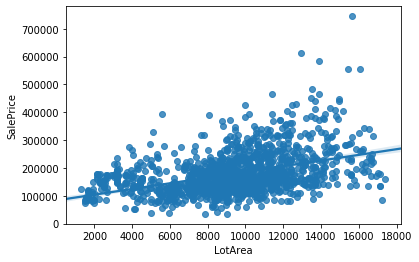

In [27]:
# to remove the outliers, use the function quantile
#0.5 is median
housing["LotArea"].quantile([0.5,0.95,0.99])
housing_sub = housing.loc[housing["LotArea"] < housing['LotArea'].quantile(0.95)]
sns.regplot(x='LotArea', y = 'SalePrice', data = housing_sub) # note the change in the data fed, housing_sub and not housing


In [31]:
#find out how many column names have the letters "sf" in them
sf_cols = [col_name for col_name in housing.columns if "SF" in col_name]
len(sf_cols)
print(sf_cols)

['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF']


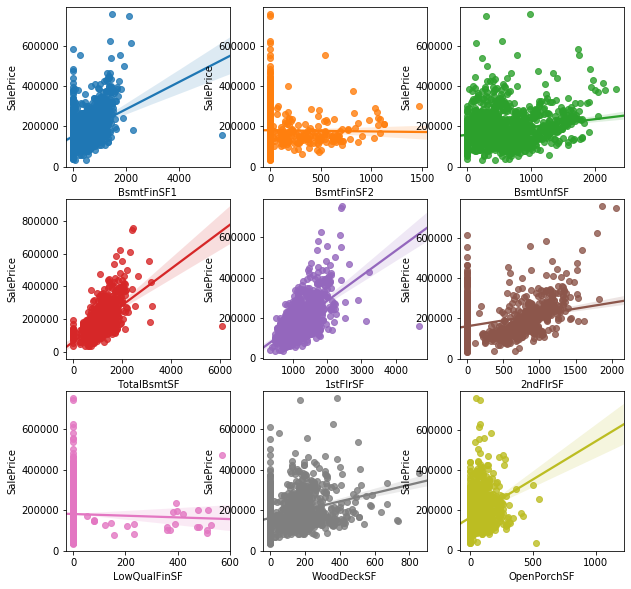

In [34]:
fig, axs = plt.subplots(nrows =3, ncols = 3, figsize=(10,10))
for i in range(0,len(sf_cols)):
    rows = i//3
    cols = i% 3
    ax = axs[rows,cols]
    plot = sns.regplot(x=sf_cols[i], y = "SalePrice", data = housing, ax=ax)


[Text(0, 0, 'VinylSd'),
 Text(0, 0, 'MetalSd'),
 Text(0, 0, 'Wd Sdng'),
 Text(0, 0, 'HdBoard'),
 Text(0, 0, 'BrkFace'),
 Text(0, 0, 'WdShing'),
 Text(0, 0, 'CemntBd'),
 Text(0, 0, 'Plywood'),
 Text(0, 0, 'AsbShng'),
 Text(0, 0, 'Stucco'),
 Text(0, 0, 'BrkComm'),
 Text(0, 0, 'AsphShn'),
 Text(0, 0, 'Stone'),
 Text(0, 0, 'ImStucc'),
 Text(0, 0, 'CBlock')]

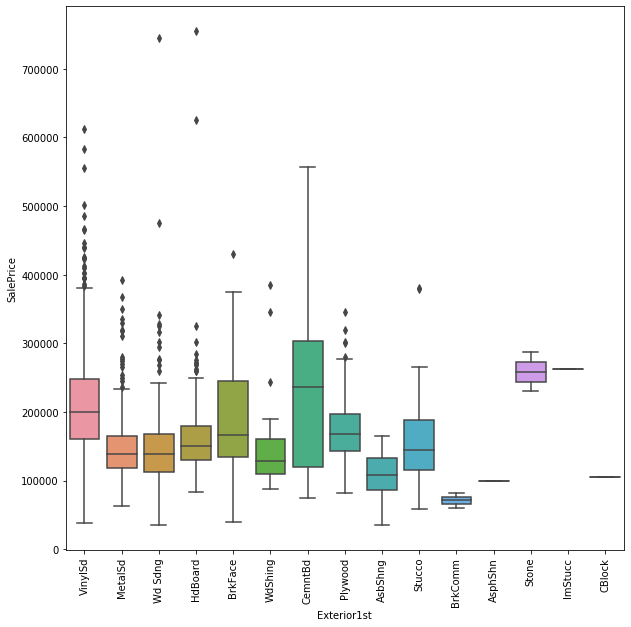

In [42]:
#use the boxplot function to plot a box plot
# The dots are the outliers. The length (y-axis wise) is the no of houses. the horizantal line defines the median 
fig, axs = plt.subplots(figsize=(10,10))
plot1 = sns.boxplot(x='Exterior1st', y = "SalePrice", data = housing, ax=axs)
plot1.set_xticklabels(plot.get_xticklabels(), rotation = 90) # rotation of n degrees